# Proyecto Interciclo Simulacion


## El presente trabajo contiene una Simulacion de una Copiadora de la Ciudad de Cuenca

### Ing. Sistemas
### Simulacion
#### Integrantes
*  ***Maria Jose Pelaez***
*  ***Pedro Bermeo***

<img src="1.jpeg" width="200"> 



*  ***Definicion del Problema***


Para el desarrollo del presente Proyecto, se busco un escenario real, es decir un local donde exista movimiento diario de clientes y de este modo lo podamos simular, para ello se planteo de la siguiente forma.

*  **1. Recoleccion de Informacion**

La Informacion usada para la simulacion del presente proyecto sera sobre un local de Copias que realiza una gran cantidad de servicios, este local se encuentra en la ciudad de Cuenca-Ecuador, y para poder obtener datos sobre el local, sobre sus movimientos y actividades que realizan, tuvimos que solicitarlos a la Propietaria del local y ella nos facilito toda la informacion relacionada con el local, los mismos que se pueden observar en el siguiente vinculo:

[Informacion sobre la Copiadora](https://drive.google.com/file/d/1-CbTYs70dT227nQBuaqUrANABj0g3YZC/view?usp=sharing)

*  **2. Resultados que se esperan**
* De la presente simulacion, se desea determinar:
    * El Numero de Clientes que lleguen al local por cada uno de los servicios que ofrece la Copiadora.
    * Los tiempos de atencion empleados por parte del personal para cada uno de los servicios.
    * Se desea conocer el tiempo promedio que se emplea por cada uno de los servicios
    
*  **3. Plan de Experimentacion**
* Para la simulacion se probara con los siguientes datos de entrada:
    * El maximo numoer de clientes sera aleatoriamente entre los 35 y 300 clientes.
    * La simulacion se ejecutara con un tiempo de ejecucion de 1700 unidades.
    * Se validara con las graficas obtenidas, en el que se detalle el numero de CLientes por Servicio, y el tiempo empleado para atender a cada servicio.
    

*  **4. Variables de Interes**
    * La Copiadora Ofrece los siguientes servicios: (Copias, Anillados, Articulos de Papeleria, Arituclos Tecnologicos, Articulos de Audio, Articulos de Celular, Recargas de Celular, Recargas de Tarjeta de Bus, Pagos de Servicios Basicos y Mantenimiento de Equipos)
    * Maximo numero de Clientes, esto varia entre 35 y 300 clientes
    * Porcentajes de la Demanda de los clientes de cada servicios ( a) 17%, b) 4%, c) 14%, d) 5%, e) 13%, f) 7%, g) 11%, h) 21%, i) 5%, j) 3% )
    * Los tiempos para realizar cada uno de los servicios es el siguiente: ( a) De 1 a 4 minutos dependiendo del número de Copias, b) De 3 a 5 minutos, c) De 1 a 3 minutos dependiendo la cantidad del pedido, d) 1 a 2 minutos, e) De 3 a 7 minutos, f) De 2 a 4 minutos, g) De 1 a 3 minutos depende la cantidad de recargas y la velocidad del Internet para la conexión con el Sistema, h) 1  a 2 minutos dependiendo del número de recargas, i) De 1 a 5 minutos dependiendo de la velocidad del Internet para la conexión con el Sistema y el número de pagos que se realizan j) Esto depende de 1 a 4 horas como máximo si es que no es muy complicada la reparación )
    * Numero de Empleados, son 2 personas las que laboran en el local
    * Entre las 2 personas podríamos realizar 4 tareas simultáneamente.
    * Pueden llegar hasta 6 personas al mismo tiempo
    * Los clientes pueden llegar en un intervalo de 1 a 6 minutos.
    * Pueden esperar un tiempo máximo de 5 minutos.
    • Una Vez que el cliente ha sido atendido en el local procede a salir

## Desarrollo del Proyecto

Como primer paso, procedemos a declarar la Autoria del presente proyecto

In [6]:
__author__ = "María José Peláez Curillo - Pedro Bermeo"
__copyright__ = "Simulacion - Universidad Politecnica Salesiana"
__credits__ = ["María José Peláez Curillo - Pedro Bermeo"]
__license__ = "GPL"
__version__ = "1.0"
__maintainer__ = "María José Peláez Curillo - Pedro Bermeo"
__email__ = "mpelaezc@est.ups.edu.ec - pbermeoa@est.ups.edu.ec"
__status__ = "Production"


### Importacion de Librerias
A continuacion importamos las librerias necesarias para la simulacion.

In [7]:
import matplotlib.pyplot as pp

import simpy
import random
import numpy as np

%matplotlib inline

### Declaracion de Variables

Se procede a declarar las Varibles que se necesitaran para la ejecucion de la simulacion, cada bloque de variables cuenta con su respectiva documentacion

In [8]:
MAX_CLIENTES = random.randint(35, 300)

NUM_EMPLEADOS = 2

MAX_CLIENTES_LLEGAN = 6

MAX_TAREAS_SIMULTANEAS = 4

MAX_TIEMPO_ESPERA = (1, 5)

T_COPIAS = round(MAX_CLIENTES * (.17))
T_ANILLADOS = round(MAX_CLIENTES * (.04))
T_ARTICULOS_PAPELERIA = round(MAX_CLIENTES * (.14))
T_ARTICULOS_TECNOLOGICOS = round(MAX_CLIENTES * (.05))
T_ARTICULOS_AUDIO = round(MAX_CLIENTES * (.13))
T_ARTICULOS_CELULAR = round(MAX_CLIENTES * (.07))
T_RECARGAS_CELULAR = round(MAX_CLIENTES * (.11))
T_RECARGAS_BUS = round(MAX_CLIENTES * (.21))
T_PAGO_SERVICIOS = round(MAX_CLIENTES * (.05))
T_MANTENIMIENTO_EQUIPOS = round(MAX_CLIENTES * (.03))

TIEMPO_ATENCION_COPIAS = [1, 4]
TIEMPO_ATENCION_ANILLADOS = [3, 5]
TIEMPO_ATENCION_ARTICULOS_PAPELERIA = [1, 3]
TIEMPO_ATENCION_ARTICULOS_TECNOLOGICOS = [1, 2]
TIEMPO_ATENCION_ARTICULOS_AUDIO = [3, 7]
TIEMPO_ATENCION_ARTICULOS_CELULARES = [2, 4]
TIEMPO_ATENCION_RECARGAS_CELULAR = [1, 3]
TIEMPO_ATENCION_RECARGAS_BUS = [1, 2]
TIEMPO_ATENCION_PAGO_SERVICIOS = [1, 5]
TIEMPO_ATENCION_MANTENIMIENTO_EQUIPOS = [60, 240]  # TIEMPO DE ATENCION EN MINUTOS PUES EN HORAS ES DE 1 A 4 HORAS

INTERVALO_LLEGADA = 6

#Se define como varibales GLOBALES QUE SE SUMARAN CADA VEZ QUE LLEGUE UN CLIENTE EN EL METODO LLEGA CLIENTE Y LUEGO PODRAN SER
#GRAFICADAS

CONTADORES= {}
CONTADORES['COPIAS']=0
CONTADORES['ANILLADOS']=0
CONTADORES['PAPELERIA']=0
CONTADORES['TECNOLOGIA']=0
CONTADORES['AUDIO']=0
CONTADORES['ARTICULOS_CELULARES']=0
CONTADORES['RECARGAS_CELULAR']=0
CONTADORES['RECARGAS_BUS']=0
CONTADORES['PAGOS_SERVICIOS']=0
CONTADORES['MANTENIMIENTO']=0

#Se declara un diccionario que calculara los tiempos de atencion para cada servicio
TIEMPOS_CALCULA= {}
TIEMPOS_CALCULA['COPIAS']=0
TIEMPOS_CALCULA['ANILLADOS']=0
TIEMPOS_CALCULA['PAPELERIA']=0
TIEMPOS_CALCULA['TECNOLOGIA']=0
TIEMPOS_CALCULA['AUDIO']=0
TIEMPOS_CALCULA['ARTICULOS_CELULARES']=0
TIEMPOS_CALCULA['RECARGAS_CELULAR']=0
TIEMPOS_CALCULA['RECARGAS_BUS']=0
TIEMPOS_CALCULA['PAGOS_SERVICIOS']=0
TIEMPOS_CALCULA['MANTENIMIENTO']=0

#Se declara un diccionario en el que se almacenara los tiempos de atencion para cada servicio
TIEMPOS= {}
TIEMPOS['COPIAS']=0
TIEMPOS['ANILLADOS']=0
TIEMPOS['PAPELERIA']=0
TIEMPOS['TECNOLOGIA']=0
TIEMPOS['AUDIO']=0
TIEMPOS['ARTICULOS_CELULARES']=0
TIEMPOS['RECARGAS_CELULAR']=0
TIEMPOS['RECARGAS_BUS']=0
TIEMPOS['PAGOS_SERVICIOS']=0
TIEMPOS['MANTENIMIENTO']=0

#Se declara un diccionario en el que se almacenara los promedios de atencion para cada servicio
PROMEDIOS_ATENCION= {}
PROMEDIOS_ATENCION['COPIAS']=0
PROMEDIOS_ATENCION['ANILLADOS']=0
PROMEDIOS_ATENCION['PAPELERIA']=0
PROMEDIOS_ATENCION['TECNOLOGIA']=0
PROMEDIOS_ATENCION['AUDIO']=0
PROMEDIOS_ATENCION['ARTICULOS_CELULARES']=0
PROMEDIOS_ATENCION['RECARGAS_CELULAR']=0
PROMEDIOS_ATENCION['RECARGAS_BUS']=0
PROMEDIOS_ATENCION['PAGOS_SERVICIOS']=0
PROMEDIOS_ATENCION['MANTENIMIENTO']=0

### Creacion de Clase Cliente

Esta Clase se define pues de cada Cliente necesitamos almacenar datos como su nombre y el servicio que solicita en la Copiadora.

In [9]:
class Cliente:
    def __init__(self, nombre, servicio):
        self.nombre = nombre
        self.servicio = servicio


### Codigo Fuente de la simulacion

A continuacion, se encuentra el codigo fuente que se encarga de realizar la simulacion y los diferentes calulos, en el que cada uno de los metodos y las variables usadas esta debidamente documentadas


<<<EXIT>>>	 El Cliente ha salido del local.
COPI-JAS

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-1 a la hora 6.00., con la necesidad de: articulos_audio
El Cliente: Articulos_Audio-1 , espero a ser antendido en la copiadora: 8.00.
El cliente Articulos_Audio-1 , es atendido en la Copiadora, a la hora 8.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Tecnologicos-1 a la hora 11.00., con la necesidad de: articulos_tecnologicos
El Cliente: Articulos_Audio-1 que solicito el servicio: articulos_audio ha sido atendido, a la hora 11.00.
El Cliente: Articulos_Tecnologicos-1 , espero a ser antendido en la copiadora: 16.00.
El cliente Articulos_Tecnologicos-1 , es atendido en la Copiadora, a la hora 16.00.
El Cliente: Articulos_Tecnologicos-1 que solicito el servicio: articulos_tecnologicos ha sido atendido, a la hora 17.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-2 a la hora 18.00., con la necesidad de: articulos_audio
El Cliente: A

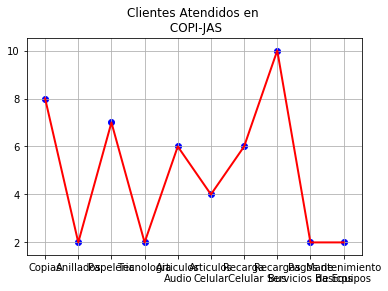

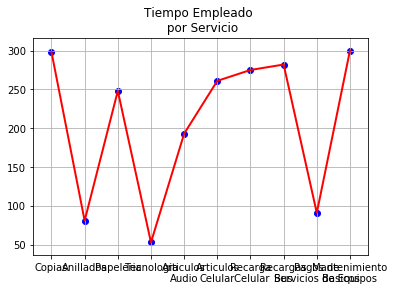

In [10]:
class Copiadora(object):
    #Recibimos los siguientes parametros
    def __init__(self, env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                 tiempo_atencion_copias, tiempo_atencion_anillados,
                 tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                 tiempo_atencion_articulos_audio,
                 tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular, tiempo_atencion_recargas_bus,
                 tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos):
        # Definimos el Entorno de ejecucion
        self.env = env
        # Se Crea un Recurso para representar el Numero de Empleados
        self.num_empleados = simpy.Resource(env, num_empleados)
        # Se Crea un Recurso para representar el Numero de Tareas Maximas ejecutadas simultaneamente
        self.max_tareas_simultaneas = simpy.Resource(env, max_tareas_simultaneas)
        # Se crea un Recurso para representar la Cantidad de personas que pueden esperar a ser atendidas
        self.num_clientes_llegan = simpy.Resource(env, num_clientes_llegan)
        # Se crea una variable para representar el tiempo que pueden esperar a ser atendidos
        self.max_tiempo_espera_atencion = tiempo_espera_atencion

        # Se define las Variables que representaran, los tiempos de atencion en la copiadora
        # para cada uno de los diferentes servicios que ofrece
        self.tiempo_atencion_copias = tiempo_atencion_copias
        self.tiempo_atencion_anillados = tiempo_atencion_anillados
        self.tiempo_atencion_articulos_papeleria = tiempo_atencion_articulos_papeleria
        self.tiempo_atencion_articulos_tecnologicos = tiempo_atencion_articulos_tecnologicos
        self.tiempo_atencion_articulos_audio = tiempo_atencion_articulos_audio
        self.tiempo_atencion_articulos_celulares = tiempo_atencion_articulos_celulares
        self.tiempo_atencion_recargas_celular = tiempo_atencion_recargas_celular
        self.tiempo_atencion_recargas_bus = tiempo_atencion_recargas_bus
        self.tiempo_atencion_pago_servicios = tiempo_atencion_pago_servicios
        self.tiempo_atencion_mantenimiento_equipos = tiempo_atencion_mantenimiento_equipos

    def atender_cliente(self, cliente, copiadora):
        # Este metodo representa el proceso de atencion a un cliente.
        # Ingresa la Persona y se le atiende

        if (cliente.servicio == 'copias'):
            TIEMPOS_CALCULA['COPIAS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_copias[0], self.tiempo_atencion_copias[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))

            TIEMPOS_CALCULA['COPIAS'] = abs(TIEMPOS_CALCULA['COPIAS']-env.now)
            TIEMPOS['COPIAS']+=TIEMPOS_CALCULA['COPIAS']

        if (cliente.servicio == 'anillados'):
            TIEMPOS_CALCULA['ANILLADOS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_anillados[0], self.tiempo_atencion_anillados[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['ANILLADOS'] = abs(TIEMPOS_CALCULA['ANILLADOS'] - env.now)
            TIEMPOS['ANILLADOS'] += TIEMPOS_CALCULA['ANILLADOS']

        if (cliente.servicio == 'articulos_papeleria'):
            TIEMPOS_CALCULA['PAPELERIA'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_papeleria[0],
                               self.tiempo_atencion_articulos_papeleria[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['PAPELERIA'] = abs(TIEMPOS_CALCULA['PAPELERIA'] - env.now)
            TIEMPOS['PAPELERIA'] += TIEMPOS_CALCULA['PAPELERIA']

        if (cliente.servicio == 'articulos_tecnologicos'):
            TIEMPOS_CALCULA['TECNOLOGIA'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_tecnologicos[0],
                               self.tiempo_atencion_articulos_tecnologicos[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['TECNOLOGIA'] = abs(TIEMPOS_CALCULA['TECNOLOGIA'] - env.now)
            TIEMPOS['TECNOLOGIA'] += TIEMPOS_CALCULA['TECNOLOGIA']

        if (cliente.servicio == 'articulos_audio'):
            TIEMPOS_CALCULA['AUDIO'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_audio[0],
                               self.tiempo_atencion_articulos_audio[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['AUDIO'] = abs(TIEMPOS_CALCULA['AUDIO'] - env.now)
            TIEMPOS['AUDIO'] += TIEMPOS_CALCULA['AUDIO']

        if (cliente.servicio == 'articulos_celulares'):
            TIEMPOS_CALCULA['ARTICULOS_CELULARES'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_celulares[0],
                               self.tiempo_atencion_articulos_celulares[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['ARTICULOS_CELULARES'] = abs(TIEMPOS_CALCULA['ARTICULOS_CELULARES'] - env.now)
            TIEMPOS['ARTICULOS_CELULARES'] += TIEMPOS_CALCULA['ARTICULOS_CELULARES']

        if (cliente.servicio == 'recargas_celular'):
            TIEMPOS_CALCULA['RECARGAS_CELULAR'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_recargas_celular[0],
                               self.tiempo_atencion_articulos_celulares[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['RECARGAS_CELULAR'] = abs(TIEMPOS_CALCULA['RECARGAS_CELULAR'] - env.now)
            TIEMPOS['RECARGAS_CELULAR'] += TIEMPOS_CALCULA['RECARGAS_CELULAR']

        if (cliente.servicio == 'recargas_bus'):
            TIEMPOS_CALCULA['RECARGAS_BUS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_recargas_bus[0],
                               self.tiempo_atencion_recargas_bus[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['RECARGAS_BUS'] = abs(TIEMPOS_CALCULA['RECARGAS_BUS'] - env.now)
            TIEMPOS['RECARGAS_BUS'] += TIEMPOS_CALCULA['RECARGAS_BUS']

        if (cliente.servicio == 'pago_servicios'):
            TIEMPOS_CALCULA['PAGOS_SERVICIOS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_pago_servicios[0],
                               self.tiempo_atencion_pago_servicios[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['PAGOS_SERVICIOS'] = abs(TIEMPOS_CALCULA['PAGOS_SERVICIOS'] - env.now)
            TIEMPOS['PAGOS_SERVICIOS'] += TIEMPOS_CALCULA['PAGOS_SERVICIOS']

        if (cliente.servicio == 'mantenimiento_equipos'):
            TIEMPOS_CALCULA['MANTENIMIENTO'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_mantenimiento_equipos[0],
                               self.tiempo_atencion_mantenimiento_equipos[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['MANTENIMIENTO'] = abs(TIEMPOS_CALCULA['MANTENIMIENTO'] - env.now)
            TIEMPOS['MANTENIMIENTO'] += TIEMPOS_CALCULA['MANTENIMIENTO']

    print("<<<EXIT>>>\t El Cliente ha salido del local.")


    def definir_tiempo_cliente(self, cliente, copiadora):
        #Este metodo, simula que el cliente ocupa uno de los 4 espacios de atencion simultanea
        with copiadora.max_tareas_simultaneas.request() as atencionCopiadora:
            # Ocupamos un espacio de atencion
            yield atencionCopiadora
            # Indicamos que el cliente entra a, ser atendido
            print('El cliente %s , es atendido en la Copiadora, a la hora %.2f.' % (cliente.nombre, env.now))
            # Procesamos la atencion en el consultorio
            yield env.process(copiadora.atender_cliente(cliente, copiadora))

def llega_cliente(env, cliente, copiadora):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el cliente a la copiadora
    print('\n<<<ARRIVES>>> \t Llega el Cliente a la copiadora: %s a la hora %.2f., con la necesidad de: %s' % (cliente.nombre, env.now,cliente.servicio))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    # un espacio de espera, de las 6 disponibles

    with copiadora.num_clientes_llegan.request() as clienteLlega:
        # Ocupamos un espacio de clientes que llegan
        yield clienteLlega
        yield env.timeout(random.randint(copiadora.max_tiempo_espera_atencion[0], copiadora.max_tiempo_espera_atencion[1]))
        # Indicamos que la persona llego a la copiadora
        print('El Cliente: %s , espero a ser antendido en la copiadora: %.2f.' % (cliente.nombre, env.now))
        # Procesamos la operacion de definir tiempos de atencion
        yield env.process(copiadora.definir_tiempo_cliente(cliente, copiadora))

def ejecutar_simulacion(env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                        tiempo_atencion_copias, tiempo_atencion_anillados,
                        tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                        tiempo_atencion_articulos_audio,
                        tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular,
                        tiempo_atencion_recargas_bus,
                        tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos, intervalo):
    copiadora = Copiadora(env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                          tiempo_atencion_copias, tiempo_atencion_anillados,
                          tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                          tiempo_atencion_articulos_audio,
                          tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular,
                          tiempo_atencion_recargas_bus,
                          tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos)

    estado = True
    while estado == True:

        # Procedemos a generar un Cliente de Cualquier Servicio randomicamente en donde:
        ''''
        SE genera los siguientes números que corresponden a los siguientes servicios:
        1. - CLIENTE PARA COPIAS
        2. - CLIENTE PARA ANILLADOS
        3. - CLIENTE PARA PAPELERIA
        4. - CLIENTE PARA TECNOLOGIA
        5. - CLIENTE PARA AUDIO
        6. - CLIENTE PARA ARTICULOS DE CELULARES
        7. - CLIENTE PARA RECARGAS DE CELULAR
        8. - CLIENTE PARA RECARGAS DE BUS
        9. - CLIENTE PARA PAGO DE SERVICIOS BASICOS
        10. - CLIENTE PARA MANTENIMIENTO DE EQUIPO
        '''
        opcionGenera = random.randint(1, 10)

        # Validamos que si ya no se puede generar mas clientes para Copias, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 1) and (CONTADORES['COPIAS'] == T_COPIAS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 1:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Copias-%d' % (CONTADORES['COPIAS'] + 1), 'copias')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['COPIAS'] += 1
            TIEMPOS['COPIAS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Anillados, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 2) and (CONTADORES['ANILLADOS'] == T_ANILLADOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 2:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Anillados-%d' % (CONTADORES['ANILLADOS'] + 1), 'anillados')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['ANILLADOS'] += 1
            TIEMPOS['ANILLADOS'] = env.now


        # Validamos que si ya no se puede generar mas clientes para Papeleria, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 3) and (CONTADORES['PAPELERIA'] == T_ARTICULOS_PAPELERIA)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 3:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Papeleria-%d' % (CONTADORES['PAPELERIA'] + 1), 'articulos_papeleria')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['PAPELERIA'] += 1
            TIEMPOS['PAPELERIA'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos de Tecnologia,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 4) and (CONTADORES['TECNOLOGIA'] == T_ARTICULOS_TECNOLOGICOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 4:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Tecnologicos-%d' % (CONTADORES['TECNOLOGIA'] + 1), 'articulos_tecnologicos')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['TECNOLOGIA'] += 1
            TIEMPOS['TECNOLOGIA'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos Audio,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 5) and (CONTADORES['AUDIO'] == T_ARTICULOS_AUDIO)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 5:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Audio-%d' % (CONTADORES['AUDIO'] + 1), 'articulos_audio')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['AUDIO'] += 1
            TIEMPOS['AUDIO'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos de Celulares,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 6) and (CONTADORES['ARTICULOS_CELULARES'] == T_ARTICULOS_CELULAR)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 6:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Celular-%d' % (CONTADORES['ARTICULOS_CELULARES'] + 1), 'articulos_celulares')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['ARTICULOS_CELULARES'] += 1
            TIEMPOS['ARTICULOS_CELULARES'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Recargas Celular,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 7) and (CONTADORES['RECARGAS_CELULAR'] == T_RECARGAS_CELULAR)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 7:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Recargas_Celular-%d' % (CONTADORES['RECARGAS_CELULAR'] + 1), 'recargas_celular')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['RECARGAS_CELULAR'] += 1
            TIEMPOS['RECARGAS_CELULAR'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Recargas de Bus,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 8) and (CONTADORES['RECARGAS_BUS'] == T_RECARGAS_BUS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 8:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Recargas_Bus-%d' % (CONTADORES['RECARGAS_BUS'] + 1), 'recargas_bus')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['RECARGAS_BUS'] += 1
            TIEMPOS['RECARGAS_BUS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Pago de Servicios Basicos,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 9) and (CONTADORES['PAGOS_SERVICIOS'] == T_PAGO_SERVICIOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 9:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Pago_Servicios-%d' % (CONTADORES['PAGOS_SERVICIOS'] + 1), 'pago_servicios')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['PAGOS_SERVICIOS'] += 1
            TIEMPOS['PAGOS_SERVICIOS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Mantenimiento de Equipos,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 10) and (CONTADORES['MANTENIMIENTO'] == T_MANTENIMIENTO_EQUIPOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 10:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Mantenimiento-%d' % (CONTADORES['MANTENIMIENTO'] + 1), 'mantenimiento_equipos')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['MANTENIMIENTO'] += 1
            TIEMPOS['MANTENIMIENTO'] = env.now
        # Si ya no puedo generar mas Clientes entonces se termina la ejecucion
        if ((CONTADORES['COPIAS'] >= T_COPIAS) and (CONTADORES['ANILLADOS'] >= T_ANILLADOS) and (
                CONTADORES['PAPELERIA'] >= T_ARTICULOS_PAPELERIA) and
                (CONTADORES['TECNOLOGIA'] >= T_ARTICULOS_TECNOLOGICOS) and (CONTADORES['AUDIO'] >= T_ARTICULOS_AUDIO) and
                (CONTADORES['ARTICULOS_CELULARES'] >= T_ARTICULOS_CELULAR) and (CONTADORES['RECARGAS_CELULAR'] >= T_ARTICULOS_CELULAR) and
                (CONTADORES['RECARGAS_BUS'] >= T_RECARGAS_BUS) and (CONTADORES['PAGOS_SERVICIOS'] >= T_PAGO_SERVICIOS) and (
                        CONTADORES['MANTENIMIENTO'] >= T_MANTENIMIENTO_EQUIPOS)):
            print("<<<ALERTA>>> No existen más clientes, por el día de hoy, se procede a cerrar el local por hoy.\n")
            estado = False


print('COPI-JAS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_EMPLEADOS, MAX_TAREAS_SIMULTANEAS, MAX_CLIENTES_LLEGAN, MAX_TIEMPO_ESPERA,
                                TIEMPO_ATENCION_COPIAS, TIEMPO_ATENCION_ANILLADOS, TIEMPO_ATENCION_ARTICULOS_PAPELERIA,
                                TIEMPO_ATENCION_ARTICULOS_TECNOLOGICOS, TIEMPO_ATENCION_ARTICULOS_AUDIO,
                                TIEMPO_ATENCION_ARTICULOS_CELULARES, TIEMPO_ATENCION_RECARGAS_CELULAR,
                                TIEMPO_ATENCION_RECARGAS_BUS,
                                TIEMPO_ATENCION_PAGO_SERVICIOS, TIEMPO_ATENCION_MANTENIMIENTO_EQUIPOS,
                                INTERVALO_LLEGADA))
env.run(until=1700)
#Calculamos los promedios de Tiempo de atencion por cada uno de los servicios de la copiadora:
PROMEDIOS_ATENCION['COPIAS']=TIEMPOS['COPIAS'] / CONTADORES['COPIAS']
PROMEDIOS_ATENCION['ANILLADOS']=TIEMPOS['ANILLADOS'] / CONTADORES['ANILLADOS']
PROMEDIOS_ATENCION['PAPELERIA']=TIEMPOS['PAPELERIA'] / CONTADORES['PAPELERIA']
PROMEDIOS_ATENCION['TECNOLOGIA']=TIEMPOS['TECNOLOGIA'] / CONTADORES['TECNOLOGIA']
PROMEDIOS_ATENCION['AUDIO']=TIEMPOS['AUDIO'] / CONTADORES['AUDIO']
PROMEDIOS_ATENCION['ARTICULOS_CELULARES']=TIEMPOS['ARTICULOS_CELULARES'] / CONTADORES['ARTICULOS_CELULARES']
PROMEDIOS_ATENCION['RECARGAS_CELULAR']=TIEMPOS['RECARGAS_CELULAR'] / CONTADORES['RECARGAS_CELULAR']
PROMEDIOS_ATENCION['RECARGAS_BUS']=TIEMPOS['RECARGAS_BUS'] / CONTADORES['RECARGAS_BUS']
PROMEDIOS_ATENCION['PAGOS_SERVICIOS']=TIEMPOS['PAGOS_SERVICIOS'] / CONTADORES['PAGOS_SERVICIOS']
PROMEDIOS_ATENCION['MANTENIMIENTO']=TIEMPOS['MANTENIMIENTO'] / CONTADORES['MANTENIMIENTO']

print('\n************************************************** RESULTADOS DE LA SIMULACION **************************************************')

print('******************************************************** CLIENTES ATENDIDOS *******************************************************')
print(CONTADORES, '\n')
print('********************************************** TIEMPOS DE ATENCION PARA CADA SERVICIO *********************************************')
print(TIEMPOS, '\n')
print('********************************************** PROMEDIO DE ATENCION POR CADA SERVICIO **********************************************')
print(PROMEDIOS_ATENCION, "\n")

# Generamos la grafica de los Clientes Atendidos

y = (CONTADORES['COPIAS'], CONTADORES['ANILLADOS'], CONTADORES['PAPELERIA'], CONTADORES['TECNOLOGIA'],
     CONTADORES['AUDIO'], CONTADORES['ARTICULOS_CELULARES'], CONTADORES['RECARGAS_CELULAR'],
     CONTADORES['RECARGAS_BUS'], CONTADORES['PAGOS_SERVICIOS'], CONTADORES['MANTENIMIENTO'])
x = ["Copias", "Anillados", "Papeleria", "Tecnologia", "Articulos\nAudio", "Articulos\nCelular", "Recarga\n Celular",
     "Recargas\nBus","Pagos de\nServicios Basicos", "Mantenimiento\nde Equipos"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='red')
pp.xticks(xn, x)
#pp.plot(x, y, linewidth=2, color='red')
pp.scatter(xn, y, color='blue')
pp.grid(True)
pp.title("Clientes Atendidos en \n COPI-JAS")
pp.show()

# Generamos la grafica de Los tiempos en que han sido atendidos cada uno de los servicios
y = (TIEMPOS['COPIAS'], TIEMPOS['ANILLADOS'], TIEMPOS['PAPELERIA'], TIEMPOS['TECNOLOGIA'],
     TIEMPOS['AUDIO'], TIEMPOS['ARTICULOS_CELULARES'], TIEMPOS['RECARGAS_CELULAR'],
     TIEMPOS['RECARGAS_BUS'], TIEMPOS['PAGOS_SERVICIOS'], TIEMPOS['MANTENIMIENTO'])
x = ["Copias", "Anillados", "Papeleria", "Tecnologia", "Articulos\nAudio", "Articulos\nCelular", "Recarga\n Celular",
     "Recargas\nBus","Pagos de\nServicios Basicos", "Mantenimiento\nde Equipos"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='red')
pp.xticks(xn, x)
#pp.plot(x, y, linewidth=2, color='red')
pp.scatter(xn, y, color='blue')
pp.grid(True)
pp.title("Tiempo Empleado \n por Servicio")
pp.show()